In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
  bbc-text.csv

In [147]:
import pandas as pd
df = pd.read_csv('./bbc-text.csv')
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [148]:
category = pd.get_dummies(df.category) # Create the new system!
category

,business,entertainment,politics,sport,tech
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
2220,1,0,0,0,0
2221,0,0,1,0,0
2222,0,1,0,0,0
2223,0,0,1,0,0


In [149]:
df_baru = pd.concat([df, category], axis=1)
df_baru

,category,text,business,entertainment,politics,sport,tech
0,tech,tv future in the hands of viewers with home th...,0,0,0,0,1
1,business,worldcom boss left books alone former worldc...,1,0,0,0,0
2,sport,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,sport,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,politics,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,entertainment,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,politics,how political squabbles snowball it s become c...,0,0,1,0,0


In [150]:
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [151]:
text = df_baru['text'].values # Convert to value
text

array(['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in 

In [152]:
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values
label

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [120]:
# Split them
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [153]:
# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')

In [154]:
tokenizer.fit_on_texts(text_latih)

In [155]:
tokenizer.fit_on_texts(text_test)

In [156]:
sekuens_latih = tokenizer.texts_to_sequences(text_latih)

In [125]:
sekuens_test = tokenizer.texts_to_sequences(text_test)

[[307,
  8,
  2767,
  2767,
  1276,
  7,
  2767,
  1220,
  284,
  94,
  2378,
  2767,
  2012,
  855,
  20,
  913,
  6,
  369,
  1276,
  7,
  2767,
  2,
  176,
  8,
  336,
  326,
  2767,
  148,
  2,
  255,
  123,
  17,
  6,
  2767,
  3,
  6,
  428,
  1271,
  18,
  376,
  309,
  11,
  6,
  277,
  577,
  240,
  148,
  123,
  46,
  73,
  151,
  35,
  373,
  7,
  2767,
  2767,
  14,
  11,
  12,
  123,
  725,
  44,
  1276,
  7,
  2767,
  191,
  1321,
  12,
  2767,
  6,
  2465,
  37,
  759,
  6,
  148,
  11,
  1260,
  284,
  375,
  346,
  138,
  181,
  855,
  5,
  1096,
  3303,
  2767,
  14,
  11,
  2,
  2702,
  4,
  6,
  1276,
  23,
  2767,
  37,
  21,
  81,
  853,
  13,
  44,
  248,
  2,
  686,
  4,
  1811,
  14,
  7,
  6,
  480,
  11,
  12,
  37,
  513,
  3,
  537,
  7,
  2,
  82,
  1713,
  4,
  59,
  2,
  124,
  2767,
  239,
  1237,
  2142,
  5,
  633,
  185,
  224,
  26,
  2539,
  13,
  2,
  49,
  653,
  631,
  801,
  8,
  2767,
  161,
  1548,
  4200,
  1576,
  7,
  6,
  3585,
  18,
  2,

In [126]:
padded_latih = pad_sequences(sekuens_latih)
padded_latih

array([[   0,    0,    0, ...,    5, 2767,  192],
       [   0,    0,    0, ...,    2, 2167,  840],
       [   0,    0,    0, ...,    8, 2890,  323],
       ...,
       [   0,    0,    0, ...,  279,  843, 2767],
       [   0,    0,    0, ...,  214,    8, 4563],
       [   0,    0,    0, ..., 3590,   15, 2773]], dtype=int32)

In [127]:
padded_test = pad_sequences(sekuens_test)
padded_test

array([[   0,    0,    0, ..., 2767,   23, 3203],
       [   0,    0,    0, ...,  482,    7,  219],
       [   0,    0,    0, ...,   13,    2, 1369],
       ...,
       [   0,    0,    0, ...,  354,   50,   98],
       [   0,    0,    0, ...,   13, 1155,  505],
       [   0,    0,    0, ...,   24,   73, 3743]], dtype=int32)

In [140]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000,output_dim=18),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [141]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 18)          90000     
_________________________________________________________________
dropout_15 (Dropout)         (None, None, 18)          0         
_________________________________________________________________
global_average_pooling1d_5 ( (None, 18)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_49 (Dense)             (None, 5)                 325       
Total params: 91,541
Trainable params: 91,541
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [143]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 1.0):
      print("\nValidasi akurasi di atas 75%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [144]:
num_epochs = 100
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test),callbacks=[callbacks])

Epoch 1/100
56/56 [==============================] - 1s 13ms/step - loss: 1.6090 - accuracy: 0.2061 - val_loss: 1.5999 - val_accuracy: 0.2315
Epoch 2/100
56/56 [==============================] - 1s 11ms/step - loss: 1.6031 - accuracy: 0.2370 - val_loss: 1.5939 - val_accuracy: 0.2315
Epoch 3/100
56/56 [==============================] - 1s 11ms/step - loss: 1.5958 - accuracy: 0.2467 - val_loss: 1.5869 - val_accuracy: 0.2360
Epoch 4/100
56/56 [==============================] - 1s 11ms/step - loss: 1.5958 - accuracy: 0.2276 - val_loss: 1.5727 - val_accuracy: 0.2427
Epoch 5/100
56/56 [==============================] - 1s 11ms/step - loss: 1.5828 - accuracy: 0.2396 - val_loss: 1.5490 - val_accuracy: 0.4067
Epoch 6/100
56/56 [==============================] - 1s 15ms/step - loss: 1.5587 - accuracy: 0.2643 - val_loss: 1.5066 - val_accuracy: 0.5551
Epoch 7/100
56/56 [==============================] - 1s 11ms/step - loss: 1.5271 - accuracy: 0.4679 - val_loss: 1.4615 - val_accuracy: 0.5753
Epoch 

56/56 [==============================] - 1s 12ms/step - loss: 0.0457 - accuracy: 0.9976 - val_loss: 0.1376 - val_accuracy: 0.9551
Epoch 59/100
56/56 [==============================] - 1s 12ms/step - loss: 0.0500 - accuracy: 0.9918 - val_loss: 0.1242 - val_accuracy: 0.9663
Epoch 60/100
56/56 [==============================] - 1s 12ms/step - loss: 0.0404 - accuracy: 0.9989 - val_loss: 0.1228 - val_accuracy: 0.9663
Epoch 61/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0475 - accuracy: 0.9948 - val_loss: 0.1279 - val_accuracy: 0.9596
Epoch 62/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0438 - accuracy: 0.9970 - val_loss: 0.1301 - val_accuracy: 0.9573
Epoch 63/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0359 - accuracy: 0.9961 - val_loss: 0.1285 - val_accuracy: 0.9640
Epoch 64/100
56/56 [==============================] - 1s 12ms/step - loss: 0.0334 - accuracy: 0.9975 - val_loss: 0.1227 - val_accuracy: 0.9663
Epoch 65/100

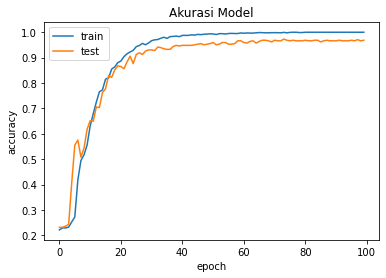

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

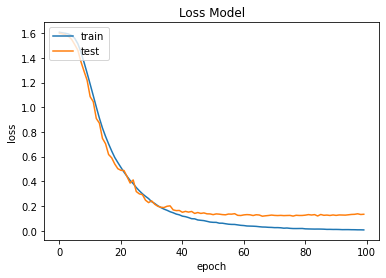

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()